<a href="https://colab.research.google.com/github/Rosalesmariana/Simulacion-I-/blob/main/Camion_de__transporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial
para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.
El peso de cada tina sigue la siguiente distribución de probabilidad:



Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso
de las tinas exceda la capacidad del camión?

(a) Resolver analíticamente.

Tenemos

$x_i \sim tri(a,b,c)$

con la siguiente condicion

$x_1 + x_2 + x_3 + x_4 + x_5 > 1000$

Hallamos la funcion de densidad de probabilidad

Sea $(190, 0)$ y $(210,1/20)$ para la primer parte de la distribucion

Obtenemos la pendiente

$m= 1/400$

Entonces por la ecuacion de la recta tenemos:

$y - y_1 =m(x - x_1)$

$y=1/400 (x-190)$

Del mismo modo para el otro segmento obtenemos

Con $(230,0)$ ; $(210,1/20)$ ; $m=-1/400)$

$y - y_1 =m(x - x_1)$

$y=- 1/400 (x-230)$

Asi:



\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        1/ 400 (x-190) & 190 \le x \le 210 \\
        - 1/ 400 (x-230) & 210 \le x \le 230.
        \end{array}
        \right.
    \end{align}

Ahora hallamos $E[x]$

\begin{align}
        \text{E[x]= } &\int_{190} ^{210} x (1/400(x-190) \mathrm{d}x \, +\int_{210}^{230} x (-1/400(x-230) \mathrm{d}x
    \end{align}

 $E[x]=210$    

 Ahora hallamos $var[x]$

 \begin{align}
        \text{var[x]= } &\int_{190} ^{210} {(x-210)}^2 (1/400(x-190)) \mathrm{d}x \, +\int_{210}^{230}  {(x-210)}^2 (-1/400(x-230)) \mathrm{d}x = 66.6
    \end{align}
$var[x]=66.6$


Usando el teorema del limite central, podemos escribir
\begin{align}
        \frac{x_1 + x_2 +x_3 +x_4 +x_5 - 5 (210)}{(\sqrt{\frac{200}{3}})(\sqrt{5})}
    \end{align}

 Luego
 $P(Z < -273) = \phi (-2.73)$

 $P(x_1 + x_2+ x_3 + x_4 + x_5 > 1000)= 1- \phi (-2.73)= 0.997$

 (b) Resolver por simulación.


 Para resolver por simulacion utilizaremos el metodo de la transformada inversa, por lo que necesitamos hallar la funcion de distribucion acumulada
Para la primer f(x)
\begin{align}
        \text{F(x)= } &\int_{0} ^{x} 1/400(s-190) \mathrm{d}s = 1/800 (x-190)^2
    \end{align}

 Para la segunda f(x)
 \begin{align}
        \text{F(x)= } &\int_{0} ^{x} - 1/400(s-230) \mathrm{d}s = 1 - 1/800 (x-230)^2
    \end{align}

  Hallamos la inversa para cada una

  Para

  $1/800 (x-190)^2 = R$

  $x= \sqrt{800 u} + 190$

Para

$1 - 1/800 (x-230)^2$

$x= 230- \sqrt{800(u-1)}$

Ahora


[1.         1.         1.         ... 0.99756995 0.99756998 0.99757   ]


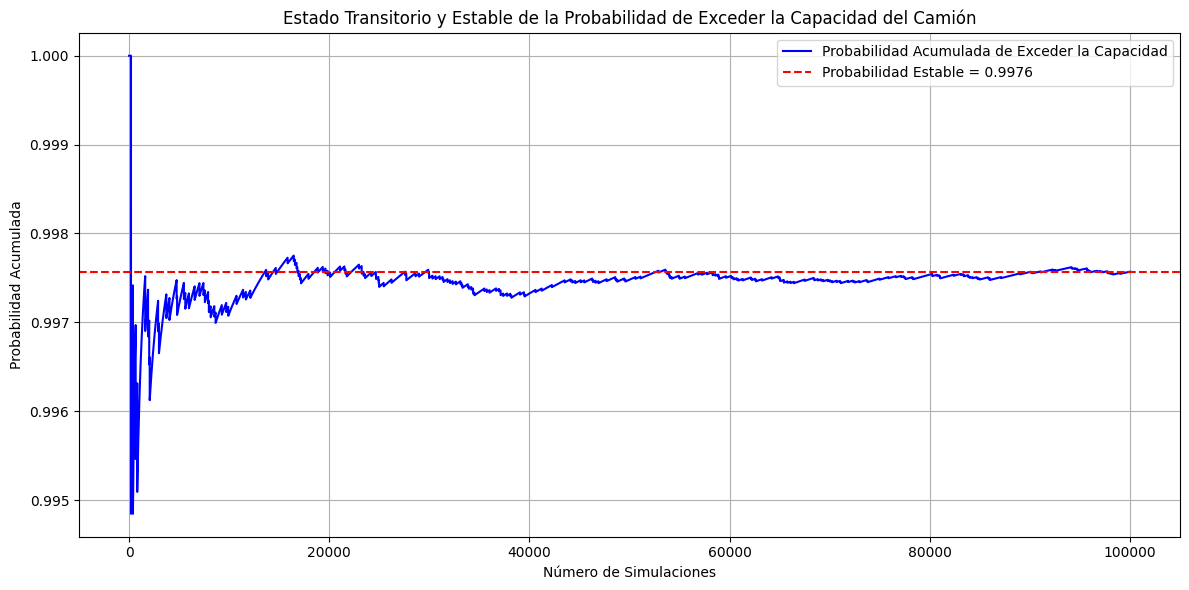

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la distribución triangular
a, b, c = 190, 230, 210
N = 100000  # Número de simulaciones
capacidad = 1000  # Capacidad del camión en kg
num_tinas = 5  # Número de tinas transportadas

# Generar N muestras de pesos para num_tinas
pesos = np.random.triangular(a, c, b, (N, num_tinas))

# Calcular el peso total de las tinas en cada simulación
suma_pesos = np.sum(pesos, axis=1)

# Calcular la probabilidad acumulada de exceder la capacidad del camión
probabilidad = np.cumsum(suma_pesos > capacidad) / np.arange(1, N + 1)
print(probabilidad)
# Crear grafica
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(probabilidad, color='blue', label='Probabilidad Acumulada de Exceder la Capacidad')
ax.axhline(y=probabilidad[-1], color='r', linestyle='--', label=f'Probabilidad Estable = {probabilidad[-1]:.4f}')
ax.set_title('Estado Transitorio y Estable de la Probabilidad de Exceder la Capacidad del Camión')
ax.set_xlabel('Número de Simulaciones')
ax.set_ylabel('Probabilidad Acumulada')
ax.legend()
ax.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

2. Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de ${$200}$. También suponga que el costo promedio anual de un nuevo camión es de $60, 000. Si se trabaja 5 días a la semana y 52 semanas al año.

¿Cuál de las dos alternativas mencionadas es la más atractiva?

(a) Resolver analíticamente

Tenemos que

$(5 dias) ( 52 semanas)= 260 dias$

donde

$260 dias → 100$ %

$x → 99.7$ %

Entonces $x= 259 dias$

Si el costo es de  $200 , entonces

Costo= $(259)({$200})= {$51, 800}$

Y si el costo de un nuevo camion es de $60,000

Entonces resulta conveniente pagar el costo adicional

(b) Resolver por simulación.




Enviar tinas excedentes con otra compañía.


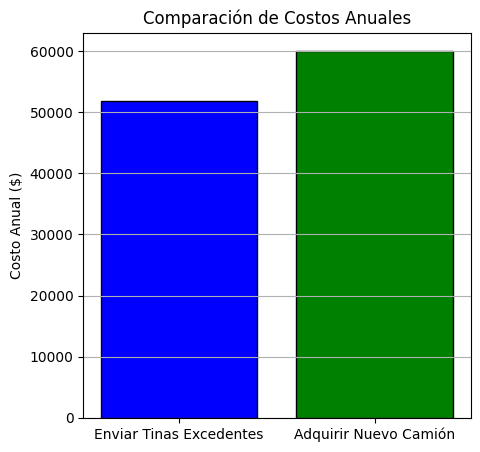

In [20]:
# Número de simulaciones
N = 100000

# Días de trabajo por año
dias_por_año = 5 * 52

# Costo de enviar una tina excedente
costo_envio = 200

# Costo anual de un nuevo camión
costo_camion = 60000

# Determinar el número de tinas excedentes por día
tinas_excedentes = np.ceil(np.maximum(suma_pesos - capacidad, 0) / np.mean(pesos[:, 0]))


# Calcular el costo diario promedio de enviar tinas excedentes
envio_diario = np.mean(tinas_excedentes) * costo_envio

# Calcular el costo anual de enviar tinas excedentes
envio_anual = envio_diario * dias_por_año

# Determinar cuál opción es más atractiva
if envio_anual < costo_camion:
    decision = "Enviar tinas excedentes con otra compañía."
else:
    decision = "Adquirir un nuevo camión."

print( decision)

# Gráfica comparativa de costos anuales
labels = ['Enviar Tinas Excedentes', 'Adquirir Nuevo Camión']
costs = [annual_cost_excess_tinas, annual_cost_new_truck]

plt.figure(figsize=(5, 5))
plt.bar(labels, costs, color=['blue', 'green'], edgecolor='black')
plt.title('Comparación de Costos Anuales')
plt.ylabel('Costo Anual ($)')
plt.grid(axis='y')
plt.show()